# 4_Filtros: Mediana Movil

Otro metodo muy utlizado para el filtrado de señales es el de Mediana Movil (...)
Debido a que este metodo tiene un costo computacional muy alto fue necesario plantear una zona más pequeña en la cual trabajar. En el script siguuiente se buscara realizar un proceso de multirate con el fin de disminuir este costo y poder analizar la señal en su totalidad 

Para la eleccion de se utilizo el trabajo 

Philip de Chazal; O'Dwyer, M.; Reilly, R.B - Automatic classification of
%  heartbeats using ECG morphology and heartbeat interval features. IEEE
%  TRANSACTIONS ON BIOMEDICAL ENGINEERING, VOL. 51, NO. 7, JULY 2004. Section
%  IV-A. ECG Filtering


Each signal was processed with a
median filter of 200-ms width to remove QRS complexes and
P-waves. The resulting signal was then processed with a median
filter of 600 ms width to remove T-waves. The signal resulting
from the second filter operation contained the baseline
of the ECG signal, which was then subtracted from the original

Además dependiendo de la base de datos la frecuencia de 30, 50 o 60 cambia segun la base de datos o la señal que se usa, por eso es necesario conocer la fft de la señal que estoy tratando, en este caso la linea es de 50Hz


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig


#------APERTURA DE LA SEÑAL-------
mat_struct = sio.loadmat('/home/luciasucunza/git_proyecto_ecg/Filtros/TP4_ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten(1)
cant_muestras = len(ecg_one_lead)

fs = 1000 
nyq_frec = fs / 2
t = np.arange(cant_muestras) / fs

c_muestras_zoom = 60000

zoom_region     = np.arange(0, c_muestras_zoom , 1)
ecg_zoom        = ecg_one_lead[zoom_region]
t_zoom          = t[zoom_region]


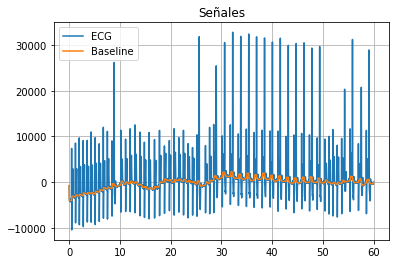

In [5]:
#------ -------
baseline = sig.medfilt (ecg_zoom, kernel_size = int (np.around(fs*0.5*0.2)    *2 +1  ))
baseline = sig.medfilt (baseline, kernel_size = int (np.around(fs*0.5*0.6)    *2 +1  )) 
baseline = sig.medfilt (baseline, kernel_size = int (np.around(fs*0.5*(1/50)) *2 +1  ))

plt.figure(1)
plt.title('Señales')
plt.plot(t_zoom, ecg_zoom,  label='ECG')
plt.plot(t_zoom, baseline,  label='Baseline')
plt.grid()
plt.legend()
plt.show()

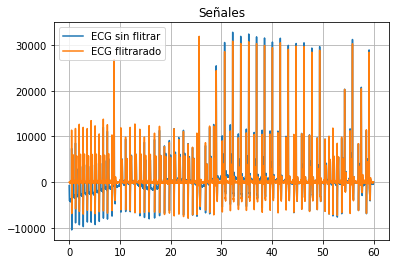

In [6]:
#------OBTENCION DE LA SEÑAL FILTRADA-------
ecg_F = ecg_zoom - baseline


#------PLOTEO DE LA SEÑAL FILTRADA-------
plt.figure(2)
plt.title('Señales')
plt.plot(t_zoom, ecg_zoom,  label='ECG sin flitrar')
plt.plot(t_zoom, ecg_F,     label='ECG flitrarado')
plt.grid()
plt.legend()
plt.show()

CONCLUSION